In [1]:
import pandas as pd


In [3]:
df = pd.read_csv('downloads/spam.csv', encoding="latin-1")

In [4]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [6]:
#Drop the columns not needed
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [7]:
#Create a new column label which has the same values as v1 then set the ham and spam values to 0 and 1 which is the standard format for our prediction.
df['label'] = df['v1'].map({'ham': 0, 'spam': 1})

In [8]:
#Create a new column having the same values as v2 column
df['message'] = df['v2']

In [9]:
#Now drop the v1 and v2
df.drop(['v1', 'v2'], axis=1, inplace=True)

In [10]:
df.head(10)

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer().fit_transform(df['message'])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [13]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(bow_transformer, df['label'], test_size=0.33, random_state=42)

In [14]:
#Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9793365959760739

In [15]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1587
           1       0.93      0.92      0.92       252

   micro avg       0.98      0.98      0.98      1839
   macro avg       0.96      0.95      0.96      1839
weighted avg       0.98      0.98      0.98      1839



In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
df.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [27]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
0        4825   4516                             Sorry, I'll call later   30
1         747    653  Please call our customer service representativ...    4

In [28]:
df['length'] = df['message'].apply(len)

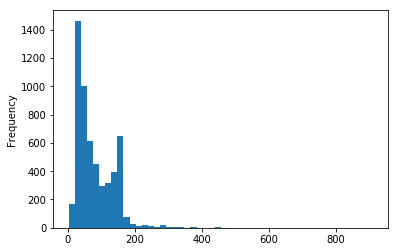

In [29]:
df['length'].plot(bins=50, kind='hist') 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000218B07D3208>,
      dtype=object)

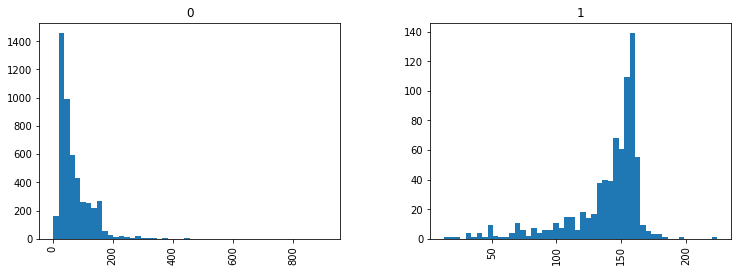

In [30]:
df.hist(column='length', by='label', bins=50,figsize=(12,4))

In [31]:
df[df['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."